In [1]:
import sys
sys.path.append('..')
from pyzx.graph import Graph
from pyzx.examples import *
from pyzx.simplify import *
from pyzx.drawing import *
from fractions import Fraction
import igraph as ig

Available backends: simple, igraph


In [2]:
sz = 2
g = Graph(backend='simple')
g.add_vertices(sz+2)
g.add_edges([(i,i+1) for i in range(sz+1)])
g.set_type(0,0)
g.set_type(sz+1,0)
for i in range(1,sz+1):
    g.set_type(i, 1)

In [3]:
g.set_angle(1,Fraction(1,4))
g.set_angle(2,Fraction(1,4))

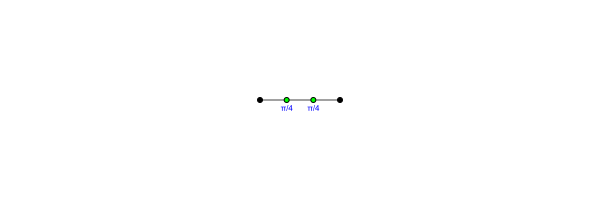

In [4]:
draw(g)

In [5]:
spider(g, [[1,2]])

In [6]:
g.get_angles()

{0: 0, 1: Fraction(1, 2), 3: 0}

In [7]:
[angle_to_s(a) for _,a in g.get_angles().items()]

['', 'π/2', '']

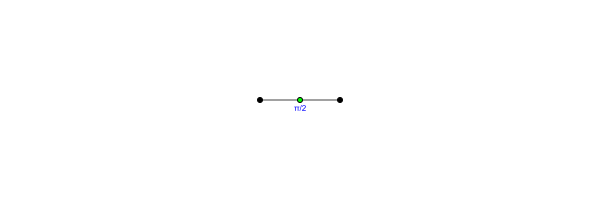

In [8]:
draw(g)

In [58]:
g1 = g.copy(backend='igraph')
#if g.backend != 'igraph':
#    raise NotImplementedError("Drawing not implemented on backend " + g.backend)
for v in g1.graph.vs:
    v['color'] = vcol(v['type'])
    #a = v['angle']
    #v['label'] = angle_to_s(a) if a else '' #v.index
if not layout:
    layout = dag_layout(g1)

return ig.plot(g1.graph, layout=layout,
               vertex_size=5,
               vertex_label_size=8,
               vertex_label_dist=2,
               vertex_label_color='blue',
               vertex_label=[angle_to_s(g1.get_angle(v)) for v in g1.vertices()],
               keep_aspect_ratio=True,
               bbox=[600,200])

[igraph.Vertex(<igraph.Graph object at 0x000001EC60F18318>, 0, {'angle': None, 'type': 0, 'color': 'black', 'label': ''}),
 igraph.Vertex(<igraph.Graph object at 0x000001EC60F18318>, 1, {'angle': Fraction(3, 4), 'type': 1, 'color': 'green', 'label': '3π/4'}),
 igraph.Vertex(<igraph.Graph object at 0x000001EC60F18318>, 2, {'angle': None, 'type': 0, 'color': 'black', 'label': ''})]

In [9]:
g1 = g.copy(backend='igraph')

In [30]:
for v in g1.graph.vs: v['label'] = 2

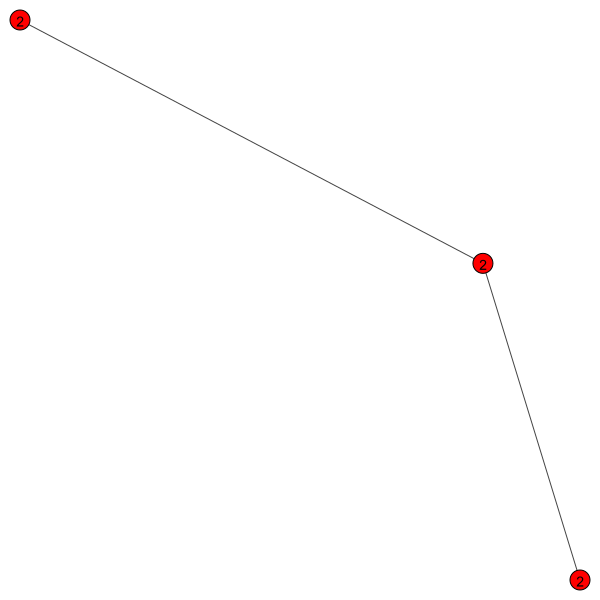

In [31]:
ig.plot(g1.graph)